In [63]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy import signal


In [2]:
# first import Ben's wavetable and check it out
ben_wavetable = np.load("public/waveshaper_grid.npy",allow_pickle=True)

(384, 64, 64)


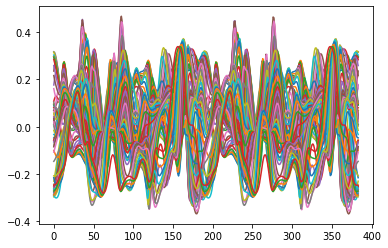

In [31]:
# explore the wavetable
print(ben_wavetable.shape)

example_waveform = ben_wavetable[:,:,0]
plt.plot(example_waveform)
plt.show()

In [76]:
def createSineHarmonics(num_harmonics):
    harmonics = np.zeros(ben_wavetable.shape[0])
    for idx,i in enumerate(num_harmonics):
        # weight decreases with increasing i
        weight = 1/(idx+1)
        harmonics += np.sin(np.linspace(0, 2*np.pi*i,
                            ben_wavetable.shape[0])) * weight
        # normalize
    harmonics = harmonics / np.max(harmonics) * 0.8
    return harmonics

In [77]:
def createSawHarmonics(num_harmonics):
    harmonics = np.zeros(ben_wavetable.shape[0])
    t = np.linspace(0, 1, ben_wavetable.shape[0])
    for idx,i in enumerate(num_harmonics):
        # weight decreases with increasing i
        weight = 1/(idx+1)
        harmonics += signal.sawtooth(2 * np.pi * i * t) * weight
        # normalize
    harmonics = harmonics / np.max(harmonics) * 0.8
    return harmonics

In [54]:
def interpolateWaveforms (waveform1,waveform2,steps):
    interpolateWaveforms = np.zeros((waveform1.shape[0],steps))
    for i in range(steps):
        interpolateWaveforms[:,i] = waveform1 + (waveform2 - waveform1) * i / steps
    return interpolateWaveforms


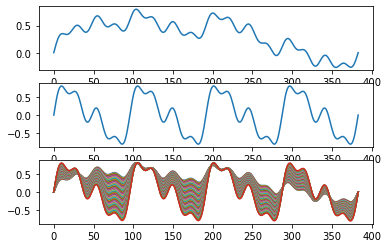

In [108]:
# Create sinewave wavetable
thickHarmonics = createSineHarmonics([0.5, 1, 2, 4, 8, 16])
thinHarmonics = createSineHarmonics([4, 8, 16])

# Interpolate between the two harmonics
interpolatedHarmonics = interpolateWaveforms(thickHarmonics, thinHarmonics, ben_wavetable.shape[1])

sine_wavetable = interpolatedHarmonics

# Plot both harmonics in separate plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.plot(thickHarmonics)
ax2.plot(thinHarmonics)
ax3.plot(interpolatedHarmonics)
plt.show()


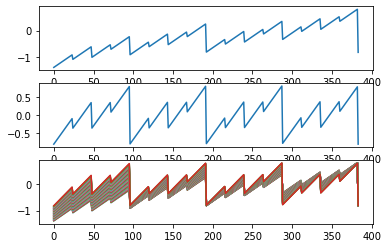

In [109]:
# Create sawtooth wavetable
thickHarmonics = createSawHarmonics([0.5, 1, 2, 4, 8, 16])
thinHarmonics = createSawHarmonics([4, 8, 16])

# Interpolate between the two harmonics
interpolatedHarmonics = interpolateWaveforms(
    thickHarmonics, thinHarmonics, ben_wavetable.shape[2])

saw_wavetable = interpolatedHarmonics

# Plot both harmonics in separate plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.plot(thickHarmonics)
ax2.plot(thinHarmonics)
ax3.plot(interpolatedHarmonics)
plt.show()


In [110]:
# Interpolate between the two wavetables to create a wavetable grid
wavegrid = np.zeros(ben_wavetable.shape)
for i in range(sine_wavetable.shape[1]):
    interpolation = interpolateWaveforms(sine_wavetable[:,i], saw_wavetable[:,i], saw_wavetable.shape[1])
    wavegrid[:,i,:] = interpolation
np.save("public/sketchsynth_wavegrid.npy", wavegrid)

(384, 64, 64)


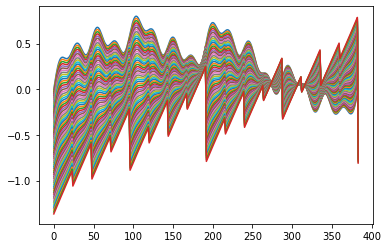

In [113]:
# explore the wavegrid
print(wavegrid.shape)

example_waveform = wavegrid[:, 0, :]
plt.plot(example_waveform)
plt.show()
